In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import time
import matplotlib.patches as patches
import glob

import matplotlib.colors as mcolors

from netCDF4 import Dataset
from scipy import stats

from wrf import getvar

from matplotlib.animation import FuncAnimation


## estimate of pressure levels from the hybrid coordinate:
## lev0=975, 5=925, 8=850, 12=700, 17=500,  19=400, 21=300, 24=200, 29=100

### First, load the lats, lons, and levs used for plotting later.

In [3]:
### Plot the height vs. time sections of potential temperature
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
file = path+'Amazon_dveg9_201409_ILgrassland/wrfout_d01_2014-09-01_00:00:00'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds1:
    lats=ds1['XLAT'][0,:,0]
    lons=ds1['XLONG'][0,0,:]
    lu1=ds1['LU_INDEX'][0,:,:]
    pb = ds1['PB'][0,:,:,:]

## Check whether LUindex is changed correctly

[Text(1, 5.0, 'forests'),
 Text(1, 9.0, 'savannas'),
 Text(1, 10.0, 'grassland'),
 Text(1, 12.0, 'cropland'),
 Text(1, 17.0, 'water')]

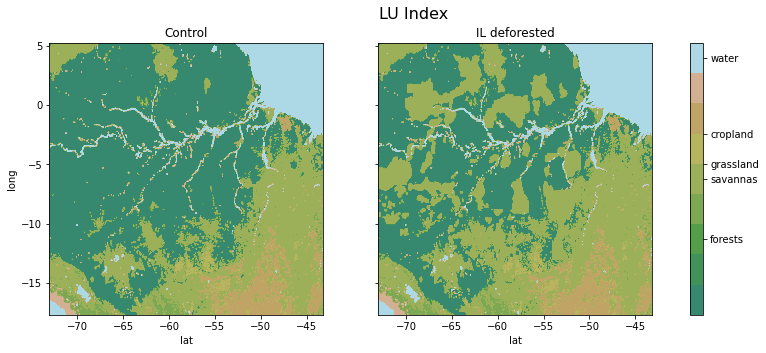

In [4]:
file0 = path+'Amazon_NoahMP/energyflux_d01_2015-11-03_00:00:00'
with xarray.open_dataset(file0,decode_times=False,
                         mask_and_scale='True') as ds0:
    lu0=ds0['LU_INDEX'][0,:,:]

file1 = path+'Amazon_NoahMP_ILdeforested/energyflux_d01_2015-11-03_00:00:00'
with xarray.open_dataset(file1,decode_times=False,
                         mask_and_scale='True') as ds1:
    lu1=ds1['LU_INDEX'][0,:,:]

### generate a new cmap
cmap = plt.get_cmap('gist_earth')
colors = cmap(np.linspace(0.3, 0.89, 100))
new_cmap = mcolors.LinearSegmentedColormap.from_list('test',colors)
new_cmap.set_over('lightblue')
############

fig,axes = plt.subplots(1,2,figsize=(13.5,5),sharex=True,sharey=True)
axes = axes.ravel()  
im=axes[0].contourf(lons,lats,lu0,cmap=new_cmap,vmax=16)  # ctrl luindex
axes[1].contourf(lons,lats,lu1,cmap=new_cmap,vmax=16)     # ILdeforeste luindex
axes[0].set_title('Control')
axes[1].set_title('IL deforested')
axes[0].set_xlabel('lat')
axes[1].set_xlabel('lat')
axes[0].set_ylabel('long')
plt.suptitle('LU Index',fontsize=16)
cbar = fig.colorbar(im,ax=axes, ticks = [5,9,10,12,17])
cbar.ax.set_yticklabels(['forests', 'savannas','grassland','cropland','water'])  # vertically oriented colorbar

# opt_run=Free drainage, opt_btr=Noah, opt_dveg = LAI from table

ok
ok


<ipython-input-23-369f2061d49e>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-23-369f2061d49e>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-23-369f2061d49e>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-23-369f2061d49e>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][0,:,:]-ds0[varname[ii-3]][0,:,:],cmap='bwr',
<ipython-input-23-369f2061d49e>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the

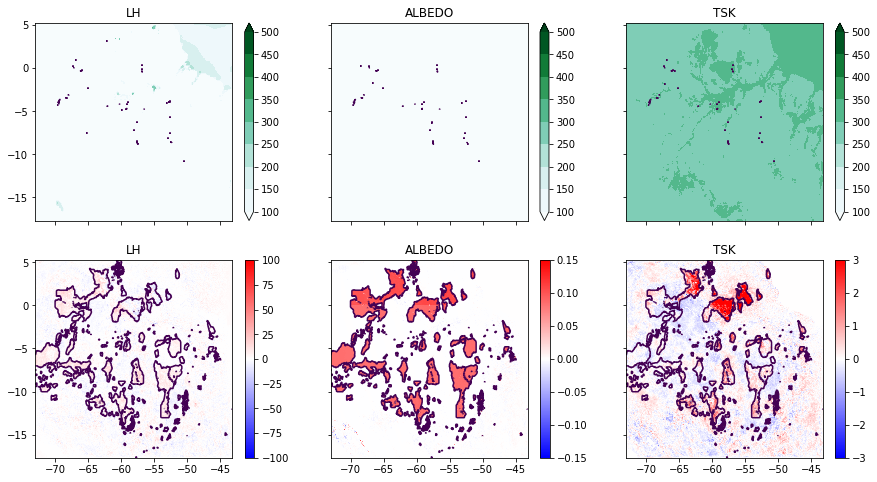

In [23]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon_NoahMP/energyflux.ctrl.UTC03mean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'Amazon_NoahMP_ILdeforested/energyflux.ILgrassland.UTC03mean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','ALBEDO','TSK']

vmins=[-100,-0.15,-3]
vmaxs=[100,0.15,3]
levs=[np.arange(100,501,50),np.arange(50,101,5),np.arange(0.15,0.21,0.01),np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-.1,.11,0.1)]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].contourf(lons,lats,ds1[varname[ii]][0,:,:],cmap='BuGn',
                            levels=levs[0],
                             extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[])

for ii in range(3,6):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][0,:,:]-ds0[varname[ii-3]][0,:,:],cmap='bwr',
                            vmin=vmins[ii-3],vmax=vmaxs[ii-3])
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii-3])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])


ok
ok


<ipython-input-7-2828430f26e2>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-7-2828430f26e2>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-7-2828430f26e2>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-7-2828430f26e2>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][0,:,:]-ds0[varname[ii-3]][0,:,:],cmap='bwr',
<ipython-input-7-2828430f26e2>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same

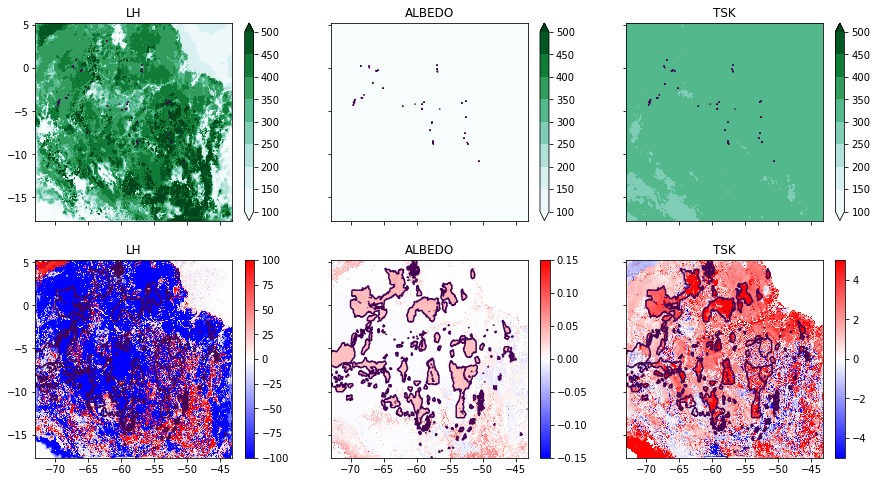

In [7]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon561x721/energyflux_d01_2015-11-01_15:00:00',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'Amazon561x721_ILgrassland/energyflux_d01_2015-11-01_15:00:00',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','ALBEDO','TSK']

vmins=[-100,-0.15,-5]
vmaxs=[100,0.15,5]
levs=[np.arange(100,501,50),np.arange(50,101,5),np.arange(0.15,0.21,0.01),np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-.1,.11,0.1)]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].contourf(lons,lats,ds1[varname[ii]][0,:,:],cmap='BuGn',
                            levels=levs[0],
                             extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[])

for ii in range(3,6):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][0,:,:]-ds0[varname[ii-3]][0,:,:],cmap='bwr',
                            vmin=vmins[ii-3],vmax=vmaxs[ii-3])
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii-3])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])

# 1. dveg=9,opt_run=Miguez drainage, opt_btr= CLM

ok
ok


<ipython-input-21-4fcef5d4ca39>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-21-4fcef5d4ca39>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-21-4fcef5d4ca39>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-21-4fcef5d4ca39>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][0,:,:]-ds0[varname[ii-3]][0,:,:],cmap='bwr',
<ipython-input-21-4fcef5d4ca39>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the

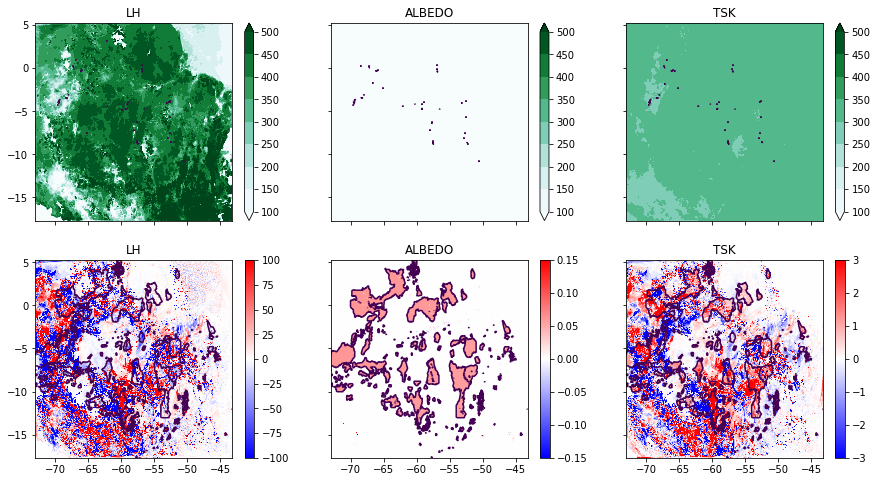

In [21]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon_NoahMP_dveg9/energyflux_d01_2015-11-05_15:00:00',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'Amazon_NoahMP_dveg9_ILgrassland/energyflux_d01_2015-11-05_15:00:00',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','EVB','TR']

vmins=[-50,-50,-0.2]
vmaxs=[50,50,0.2]
levs=[np.arange(100,501,50),np.arange(50,101,5),np.arange(0.15,0.21,0.01),np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-.1,.11,0.1)]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(1):
    img = axes[ii].contourf(lons,lats,ds1[varname[ii]][0,:,:],cmap='BuGn',
                            levels=levs[0],
                             extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[])

for ii in range(3,4):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][0,:,:]-ds0[varname[ii-3]][0,:,:],cmap='bwr',
                            vmin=-100,vmax=100)
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii-3])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])

plt.figure()
plt.pcolormesh(lons,lats,ds1['ALBEDO'][0,:,:]-ds0['ALBEDO'][0,:,:],cmap='bwr',
                            vmin=-0.15,vmax=0.15)
plt.colorbar()

# dveg=4,opt_run=Miguez drainage, opt_btr= CLM

ok
ok


<ipython-input-24-76672e00e143>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-24-76672e00e143>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-24-76672e00e143>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-24-76672e00e143>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][15,:,:]-ds0[varname[ii-3]][15,:,:],cmap='bwr',
<ipython-input-24-76672e00e143>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have t

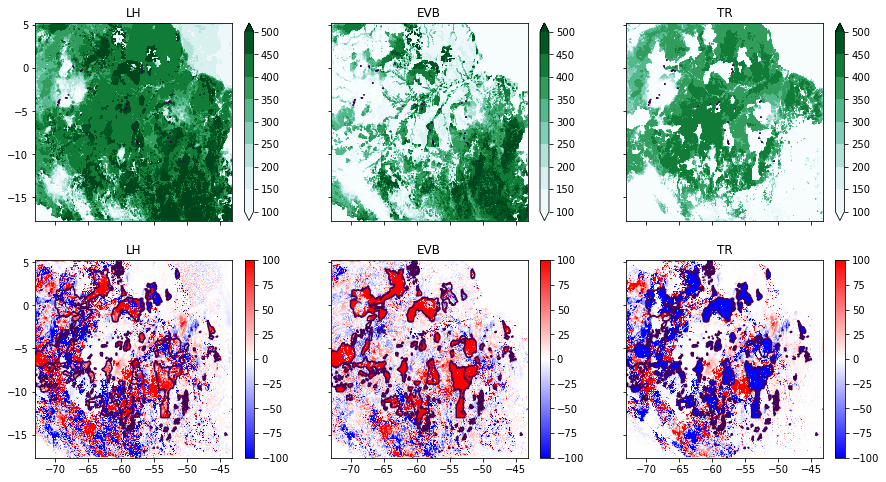

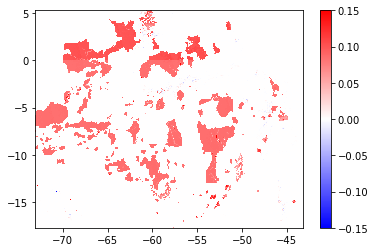

In [24]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'test_Noah_dveg4/energyflux_d01_2015-11-05_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'test_Noah_dveg4_ILgrassland/energyflux_d01_2015-11-05_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','EVB','TR'] 

vmins=[-50,-50,-0.2]
vmaxs=[50,50,0.2]
levs=[np.arange(100,501,50),np.arange(50,101,5),np.arange(0.15,0.21,0.01),np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-.1,.11,0.1)]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].contourf(lons,lats,ds1[varname[ii]][15,:,:],cmap='BuGn',
                            levels=levs[0],
                             extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[])

for ii in range(3,6):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][15,:,:]-ds0[varname[ii-3]][15,:,:],cmap='bwr',
                            vmin=-100,vmax=100)
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii-3])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])

############
plt.figure()
plt.pcolormesh(lons,lats,ds1['ALBEDO'][0,:,:]-ds0['ALBEDO'][0,:,:],cmap='bwr',
                            vmin=-0.15,vmax=0.15)
plt.colorbar()

# opt_run=free drainage
### opt_btr = CLM,dveg=9

ok
ok


<ipython-input-15-e32728160231>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-15-e32728160231>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-15-e32728160231>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-15-e32728160231>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][15,:,:]-ds0[varname[ii-3]][15,:,:],cmap='bwr',
<ipython-input-15-e32728160231>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have t

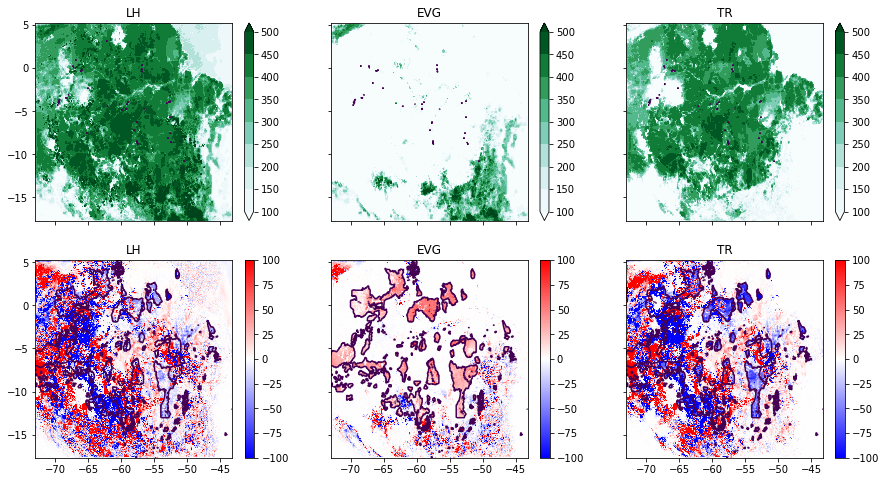

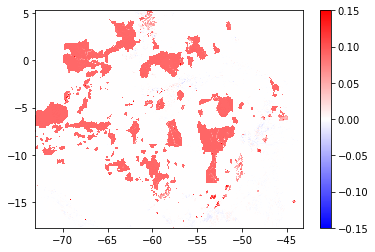

In [15]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'test_Noah_optrun3/energyflux_d01_2015-11-05_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'test_Noah_optrun3_ILgrassland/energyflux_d01_2015-11-05_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','EVG','TR']

vmins=[-50,-50,-0.2]
vmaxs=[50,50,0.2]
levs=[np.arange(100,501,50),np.arange(50,101,5),np.arange(0.15,0.21,0.01),np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-.1,.11,0.1)]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].contourf(lons,lats,ds1[varname[ii]][15,:,:],cmap='BuGn',
                            levels=levs[0],
                             extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[])

for ii in range(3,6):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][15,:,:]-ds0[varname[ii-3]][15,:,:],cmap='bwr',
                            vmin=-100,vmax=100)
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii-3])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])
    
############
plt.figure()
plt.pcolormesh(lons,lats,ds1['ALBEDO'][0,:,:]-ds0['ALBEDO'][0,:,:],cmap='bwr',
                            vmin=-0.15,vmax=0.15)
plt.colorbar()

# opt_run=3,opt_btr=1,dveg=9

ok
ok


<ipython-input-6-ae3589758871>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-6-ae3589758871>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])


KeyError: 'TSK'

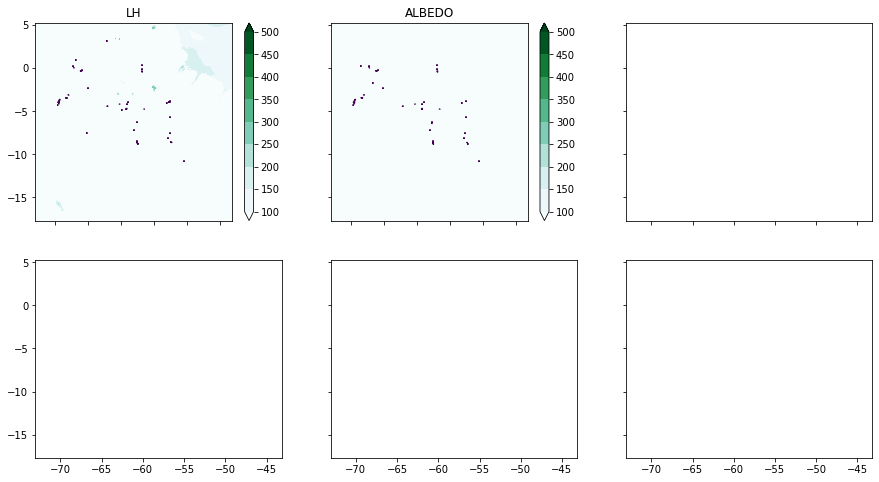

In [6]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'test_optbtr1_optrun3_dveg9/energy.ctrl.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'test_optbtr1_optrun3_dveg9_ILgrassland/energy.ILgrassland.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','ALBEDO','TSK']

vmins=[-100,-0.15,-3]
vmaxs=[100,0.15,3]
levs=[np.arange(100,501,50),np.arange(50,101,5),np.arange(0.15,0.21,0.01),np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-.1,.11,0.1)]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].contourf(lons,lats,ds1[varname[ii]][0,:,:],cmap='BuGn',
                            levels=levs[0],
                             extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[])

for ii in range(3,6):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][0,:,:]-ds0[varname[ii-3]][0,:,:],cmap='bwr',
                            vmin=vmins[ii-3],vmax=vmaxs[ii-3])
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii-3])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])

# opt_run=3,opt_btr=2,dveg=4

ok
ok


<ipython-input-11-5e91195f93f6>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-11-5e91195f93f6>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-11-5e91195f93f6>:24: UserWarning: No contour levels were found within the data range.
  axes[ii].contour(lons,lats,lu1-lu0,levels=[])
<ipython-input-11-5e91195f93f6>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][0,:,:]-ds0[varname[ii-3]][0,:,:],cmap='bwr',
<ipython-input-11-5e91195f93f6>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the

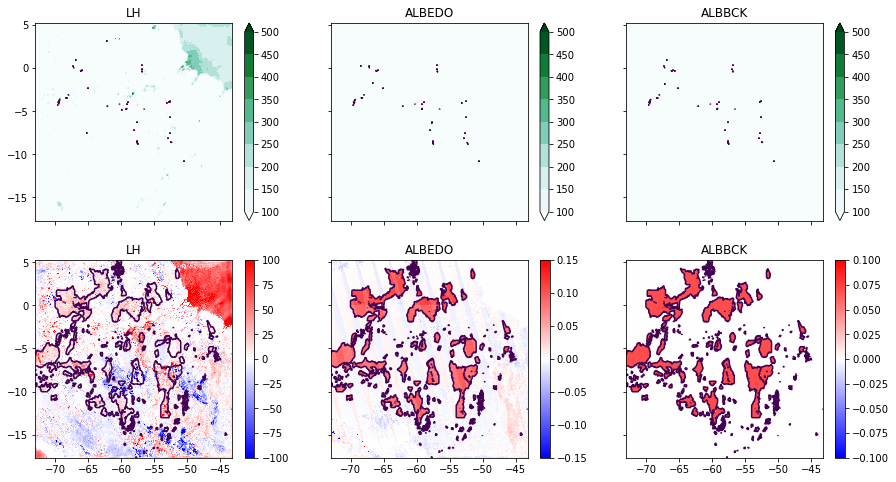

In [11]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'test_Noah_dveg4_btr2_run3/energyflux_d01_2015-11-25_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'test_Noah_dveg4_btr2_run3_ILgrassland/energyflux_d01_2015-11-05_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','ALBEDO','ALBBCK']

vmins=[-100,-0.15,-.1]
vmaxs=[100,0.15,.1]
levs=[np.arange(100,501,50),np.arange(50,101,5),np.arange(0.15,0.21,0.01),np.arange(-50,51,10),np.arange(-50,51,10),np.arange(-.1,.11,0.1)]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].contourf(lons,lats,ds1[varname[ii]][0,:,:],cmap='BuGn',
                            levels=levs[0],
                             extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[])

for ii in range(3,6):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-3]][0,:,:]-ds0[varname[ii-3]][0,:,:],cmap='bwr',
                            vmin=vmins[ii-3],vmax=vmaxs[ii-3])
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii-3])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1])

<ipython-input-14-70da221e7a84>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(lons,lats,ds1['ALBEDO'][15,:,:]-ds0['ALBEDO'][15,:,:],cmap='bwr',


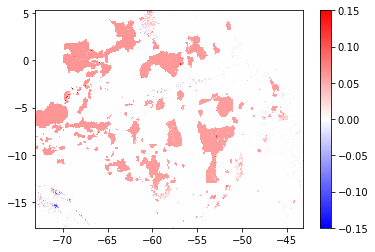

In [14]:
plt.pcolormesh(lons,lats,ds1['ALBEDO'][15,:,:]-ds0['ALBEDO'][15,:,:],cmap='bwr',
                            vmin=-0.15,vmax=0.15)
plt.colorbar()

# Questions to answer: 1. budget of LH. 2. extend optrun3 to 1mon to compare with dveg9. 3. check optbtr=2.

ok
ok


<ipython-input-44-19bd2776879b>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[tt].pcolormesh(lons,lats,ds1[varname[0]][0,:,:]-ds0[varname[0]][0,:,:],cmap='bwr',


ok
ok


<ipython-input-44-19bd2776879b>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[tt].pcolormesh(lons,lats,ds1[varname[0]][0,:,:]-ds0[varname[0]][0,:,:],cmap='bwr',


ok
ok


<ipython-input-44-19bd2776879b>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[tt].pcolormesh(lons,lats,ds1[varname[0]][0,:,:]-ds0[varname[0]][0,:,:],cmap='bwr',


ok
ok


<ipython-input-44-19bd2776879b>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[tt].pcolormesh(lons,lats,ds1[varname[0]][0,:,:]-ds0[varname[0]][0,:,:],cmap='bwr',
<ipython-input-44-19bd2776879b>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[tt].pcolormesh(lons,lats,ds1[varname[0]][0,:,:]-ds0[varname[0]][0,:,:],cmap='bwr',


ok
ok


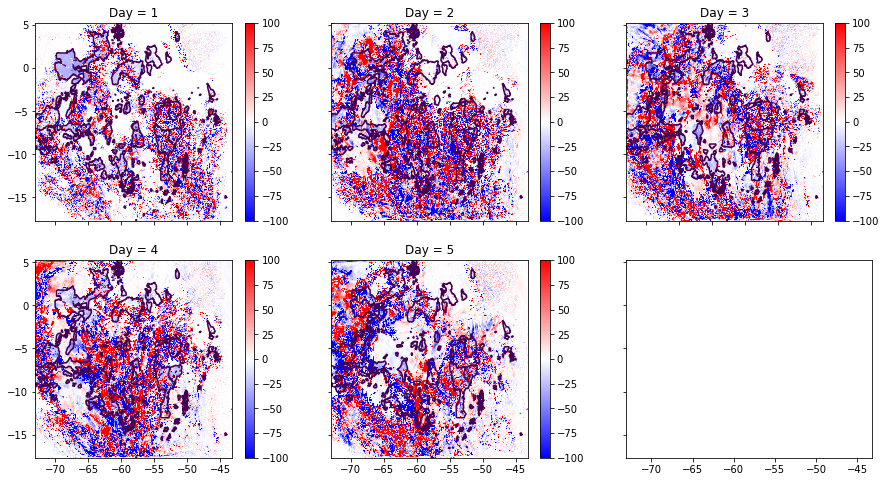

In [44]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'

f0s=glob.glob(path+'Amazon_NoahMP_dveg9/energyflux_d01_2015-11-??_15:00:00')
f0s.sort()
f1s=glob.glob(path+'Amazon_NoahMP_dveg9_ILgrassland/energyflux_d01_2015-11-??_15:00:00')
f1s.sort()

fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','EVB','TR']

for tt,ifile in enumerate([0,1,2,3,4]):
    with xarray.open_dataset(f0s[ifile],decode_times=False,
                         mask_and_scale='True') as ds0:
        print('ok')

    with xarray.open_dataset(f1s[ifile],decode_times=False,
                         mask_and_scale='True') as ds1:
        print('ok')
    
        img = axes[tt].pcolormesh(lons,lats,ds1[varname[0]][0,:,:]-ds0[varname[0]][0,:,:],cmap='bwr',
                                vmin=-100,vmax=100)
        fig.colorbar(img,ax=axes[tt])
        axes[tt].set_title('Day = '+str(ifile+1))
        axes[tt].contour(lons,lats,lu1-lu0,levels=[1])

## Soil moisture

In [9]:
with xarray.open_dataset(path+'SMOIS.201409_201412.ILave.ctrl.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
    
with xarray.open_dataset(path+'SMOIS.201409_201412.ILave.ILgrassland.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
smois0_areaave = ds0['SMOIS']
smois1_areaave = ds1['SMOIS']

ok
ok


Text(0, 0.5, 'Soil Moisture [m3/m3]')

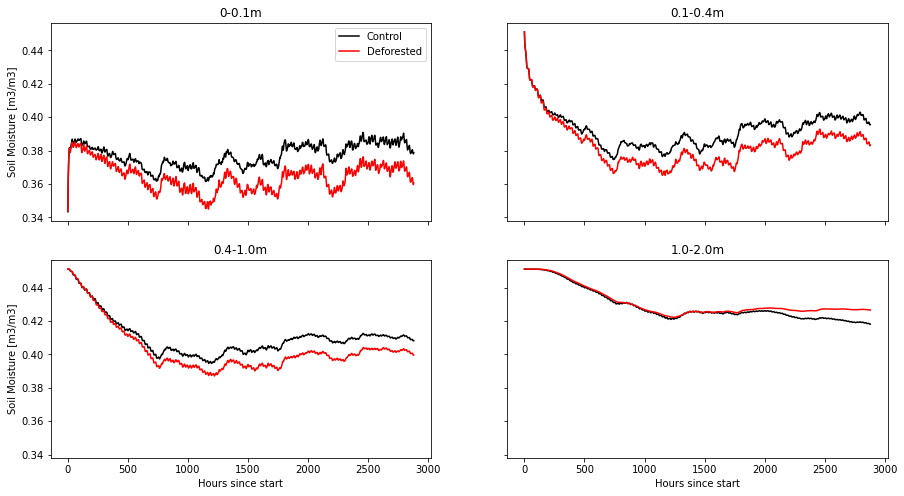

In [11]:
fig,axes = plt.subplots(2,2,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
titles=['0-0.1m','0.1-0.4m','0.4-1.0m','1.0-2.0m']
for ii in range(4):
    axes[ii].plot(smois0_areaave[:,ii],'k',label='Control')
    axes[ii].plot(smois1_areaave[:,ii],'r',label='Deforested')
    axes[ii].set_title(titles[ii])
axes[0].legend()
axes[2].set_xlabel('Hours since start')
axes[3].set_xlabel('Hours since start')
axes[0].set_ylabel('Soil Moisture [m3/m3]')
axes[2].set_ylabel('Soil Moisture [m3/m3]')

### Soil moisture

In [83]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'

with xarray.open_dataset(path+'Amazon_NoahMP_dveg9_201407_ILgrassland/dif_LAND.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
fig,axes = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['SMOIS']


for ii in range(6):
    img = axes[ii].pcolormesh(lons,lats,ds1['SMOIS'][600+ii*5,0,:,:],cmap='coolwarm',vmin=-0.1,vmax=0.1
                         )
fig.colorbar(img,ax=axes[0])
#axes[ii].contour(lons,lats,lu1,levels=[5])

ok


<ipython-input-83-b578299b01ef>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1['SMOIS'][600+ii*5,0,:,:],cmap='coolwarm',vmin=-0.1,vmax=0.1


In [ ]:
### TSK for both noon and night
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
img = axes[0].contourf(lons,lats,ds0['TSK'].mean('Time')-273.15,cmap='rainbow',
                             levels=np.arange(20,51,1),extend='both')
fig.colorbar(img,ax=axes[0])
axes[0].set_title('TSK at local noon')
### local night
img = axes[1].contourf(lons,lats,ds1['TSK'].mean('Time')-273.15,cmap='rainbow',
                             levels=np.arange(20,31,1),extend='both')
fig.colorbar(img,ax=axes[1])
axes[ii].set_title('TSK at local night')

In [17]:
### Default NOAH_MP
with xarray.open_dataset(path+'post_processing/Amazon561x721/energy.2015.obs.NoahMP.multidaymean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
    
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','HFX','TSK','ALBEDO']
levs=[np.arange(300,501,10),np.arange(100,301,10),np.arange(20,51,1)]

for ii in range(2):
    img = axes[ii].contourf(lons,lats,ds0[varname[ii]][15,:,:],cmap='rainbow',
                             levels=levs[ii],extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    #axes[ii].contour(lons,lats,lu1,levels=[5])

### TSK for both noon and night
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
img = axes[0].contourf(lons,lats,ds0['TSK'][15,:,:]-273.15,cmap='rainbow',
                             levels=np.arange(20,51,1),extend='both')
fig.colorbar(img,ax=axes[0])
axes[0].set_title('TSK at local noon')
### local night
img = axes[1].contourf(lons,lats,ds0['TSK'][5,:,:]-273.15,cmap='rainbow',
                             levels=np.arange(20,31,1),extend='both')
fig.colorbar(img,ax=axes[1])
axes[ii].set_title('TSK at local night')    

ok


Text(0.5, 1.0, 'TSK at local night')

ok


Text(0.5, 1.0, 'TSK at local night')

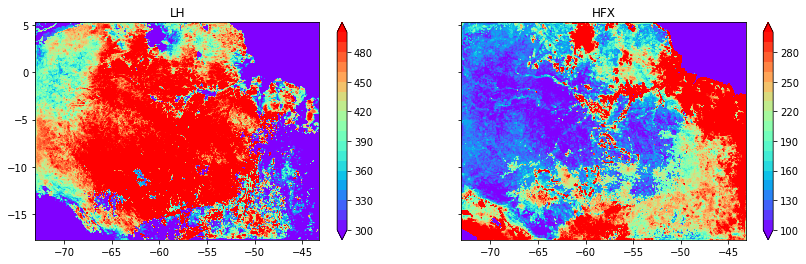

In [18]:
#### CLM4 
with xarray.open_dataset(path+'post_processing/Amazon561x721/energy.201511.obs.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
    
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','HFX','TSK','ALBEDO']
levs=[np.arange(300,501,10),np.arange(100,301,10),np.arange(20,51,1)]

for ii in range(2):
    img = axes[ii].contourf(lons,lats,ds0[varname[ii]][15,:,:],cmap='rainbow',
                             levels=levs[ii],extend='both')
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    #axes[ii].contour(lons,lats,lu1,levels=[5])

### TSK for both noon and night
fig,axes = plt.subplots(1,2,figsize=(14,4),sharex=True,sharey=True)
axes = axes.ravel()  
img = axes[0].contourf(lons,lats,ds0['TSK'][15,:,:]-273.15,cmap='rainbow',
                             levels=np.arange(20,51,1),extend='both')
fig.colorbar(img,ax=axes[0])
axes[0].set_title('TSK at local noon')
### local night
img = axes[1].contourf(lons,lats,ds0['TSK'][5,:,:]-273.15,cmap='rainbow',
                             levels=np.arange(20,31,1),extend='both')
fig.colorbar(img,ax=axes[1])
axes[ii].set_title('TSK at local night')    

ok
ok


<ipython-input-6-2c93235d98cf>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-6-2c93235d98cf>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-6-2c93235d98cf>:21: MatplotlibDeprecationWarning: shading='flat' when

Text(0.5, 0.98, 'Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

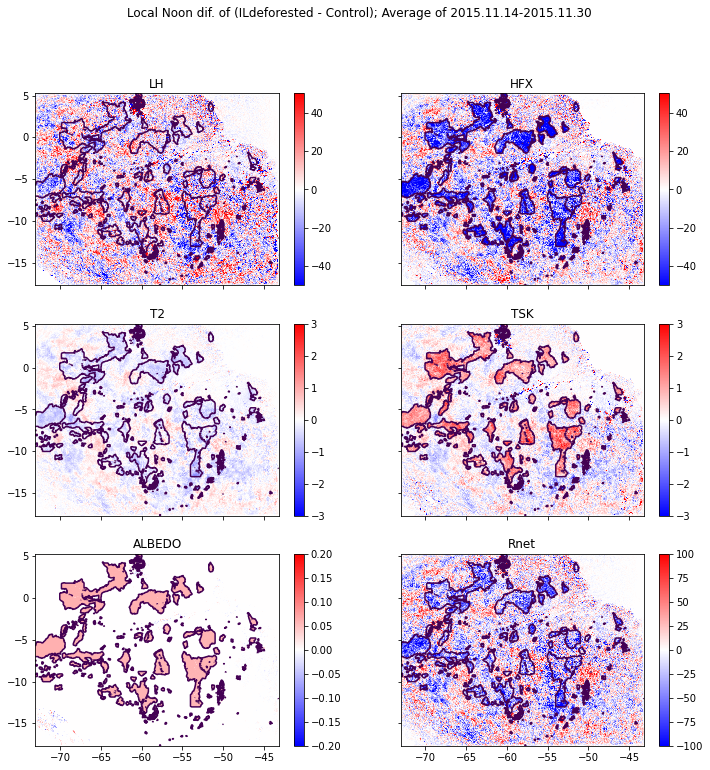

In [6]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
#with xarray.open_dataset(path+'Amazon/energyflux_d01_2015-11-01_15:00:00',decode_times=False,
with xarray.open_dataset(path+'Amazon_NoahMP_dveg9/energyflux_d01_201511_15UTC.obs.multidaymean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

#with xarray.open_dataset(path+'post_processing/Amazon561x721/energy.201511.obs.nc',decode_times=False,
 #                        mask_and_scale='True') as ds0:
with xarray.open_dataset(path+'Amazon_NoahMP_dveg9_ILgrassland/energyflux_d01_201511_15UTC.ILgrassland.multidaymean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')
    
fig,axes = plt.subplots(3,2,figsize=(12,12),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','HFX','T2','TSK','ALBEDO']

vmins=[-50,-50,-3,-3,-0.2,-100]
vmaxs=[50,50,3,3,0.2,100]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(5):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
                             vmin=vmins[ii],vmax=vmaxs[ii])
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])
    
## plot Rnet
Rnet0 = ds0['LH'] + ds0['HFX']
Rnet1 = ds1['LH'] + ds1['HFX']

img = axes[5].pcolormesh(lons,lats,Rnet1.mean('Time')-Rnet0.mean('Time'),vmin=vmins[5],vmax=vmaxs[5],
                       cmap='bwr')

fig.colorbar(img,ax=axes[5])
axes[5].set_title('Rnet')
axes[5].contour(lons,lats,lu1-lu0,levels=[1,10])    

plt.suptitle('Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

## Diurnal cycle

In [53]:
dif = ds1[varname[ii]] - ds0[varname[ii]]
dif_lu = lu1-lu0
dif_forests = dif.where(dif_lu>0)
diurnal_north = dif_forests[:,380:,200:600].mean(('south_north','west_east'))
diurnal_west = dif_forests[0,100:,:200].mean(('south_north','west_east'))
#plt.contourf(dif_forests)


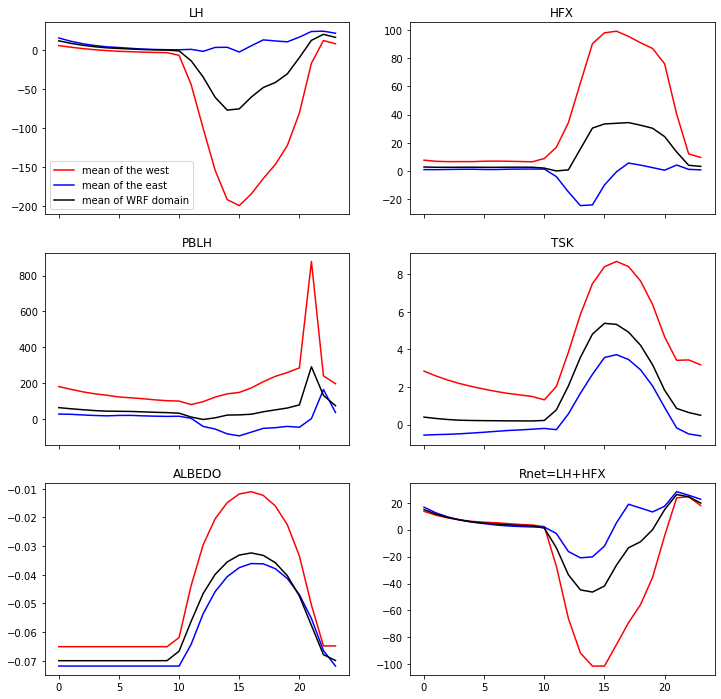

In [70]:
fig,axes = plt.subplots(3,2,figsize=(12,12),sharex=True)
axes = axes.ravel()  
varname = ['LH','HFX','PBLH','TSK','ALBEDO','Rnet=LH+HFX']
for ii in range(5):
    dif = ds1[varname[ii]] - ds0[varname[ii]]
    dif_lu = lu1-lu0
    dif_forests = dif.where(dif_lu>0)
    diurnal_north = dif_forests[:,380:,200:600].mean(('south_north','west_east'))
    diurnal_west = dif_forests[:,100:,:200].mean(('south_north','west_east'))
    diurnal_all = dif_forests.mean(('south_north','west_east'))

    
    axes[ii].plot(range(24),diurnal_north,'-r',label='mean of the west')
    axes[ii].plot(range(24),diurnal_west,'-b',label='mean of the east')
    axes[ii].plot(range(24),diurnal_all,'-k',label='mean of WRF domain')

    axes[ii].set_title(varname[ii])
    
axes[0].legend()
   
## plot Rnet
dif_Rnet = ds1['LH'] + ds1['HFX'] - (ds0['LH'] + ds0['HFX'])
dif_forests = dif_Rnet.where(dif_lu>0)
diurnal_north = dif_forests[:,380:,200:600].mean(('south_north','west_east'))
diurnal_west = dif_forests[:,100:,:200].mean(('south_north','west_east'))
diurnal_all = dif_forests.mean(('south_north','west_east'))
axes[5].plot(range(24),diurnal_north,'-r')
axes[5].plot(range(24),diurnal_west,'-b')
axes[5].plot(range(24),diurnal_all,'-k')
axes[5].set_title(varname[5])

